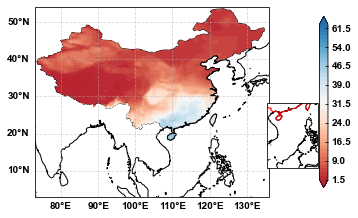

In [10]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt 
import numpy as np
import netCDF4 as nc
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

file = r'./data/ERA/ERA5_China.nc'
nc_data_object = nc.Dataset(file)

lons = nc_data_object.variables['longitude'][:]
lats = nc_data_object.variables['latitude'][:]
tcwv = np.asarray(nc_data_object.variables['tcwv'])[0]

lons_grid, lats_grid = np.meshgrid(lons, lats)


# 设置图像中的字体
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10
plt.rcParams['font.weight'] = 'bold'

# 添加中国的海岸线
china = shpreader.Reader('./data/ERA/china0.shp').geometries()
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(6, 4.5))
ax = fig.add_subplot(1, 1 , 1, projection=proj)
ax.add_geometries(china, ccrs.PlateCarree(), facecolor='none', edgecolor='k', linewidth=1, zorder=1)

import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
# 自定义颜色条、色阶 
cmap = mpl.cm.RdBu
newcolors=cmap(np.linspace(0, 1, 256))
newcmp = ListedColormap(newcolors[30:226])

# 绘制制定区域内的浓度图像
cf = ax.contourf(lons_grid, lats_grid, tcwv, levels=50, cmap=newcmp, 
                 transform=proj, extend='both') 
cb = fig.colorbar(cf, shrink=0.7, orientation='vertical', pad=0.15)  # 设置颜色条的位置和标签
cb.ax.set_xlabel('T2M(kg/$cm^2$)', fontweight='bold')
cb.ax.tick_params(which='major', direction='in', length=3)


# 添加小格子
gl = ax.gridlines(alpha=0.5, linestyle='--', draw_labels=True, 
                   dms=True, x_inline=False, y_inline=False)
gl.right_labels = 0
gl.top_labels = 0
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=1)

# 南海群岛
ax_sub = fig.add_axes([0.6615,0.3,0.12,0.2], projection=proj)  # [*left*, *bottom*, *width*,*height*]
ax_sub.set_extent([105,125,0,25], crs=ccrs.PlateCarree())
ax_sub.add_feature(cfeature.COASTLINE.with_scale('50m'))
china2 = shpreader.Reader('./data/ERA/china0.shp').geometries()
ax_sub.add_geometries(china2, ccrs.PlateCarree(), facecolor='none', edgecolor='r', linewidth=1, zorder=1)

import maskout
clip=maskout.shp2clip(cf, ax, r'./data/ERA/china0') # 白化
